In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
import os
os.chdir('./code/')

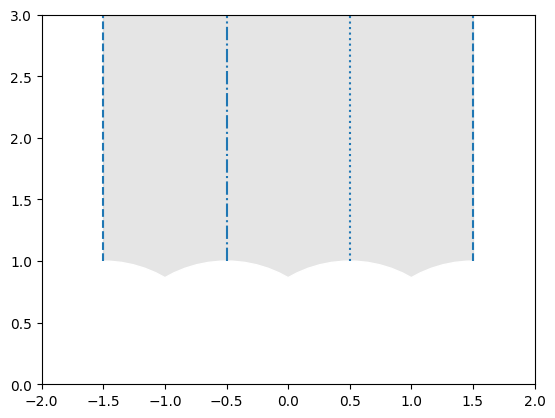

In [21]:
fig,ax = plt.subplots()
circle0 = mpl.patches.Circle((-1.5,0),radius=1,color='w')
circle1 = mpl.patches.Circle((-0.5,0),radius=1,color='w')
circle2 = mpl.patches.Circle((0.5,0),radius=1,color='w')
circle3 = mpl.patches.Circle((1.5,0),radius=1,color='w')

rec = mpl.patches.Rectangle((-1.5,0),3,3,color =[0.5,0.5,0.5,0.2])
ax.add_patch(rec)
for circle in [circle0,circle1,circle2,circle3]:
    ax.add_patch(circle)

ax.vlines(x=0.5,ymin=1,ymax = 3,linestyles='dotted')
ax.vlines(x=-0.5,ymin=1,ymax = 3,linestyles='dashdot')
ax.vlines(x=-1.5,ymin=1,ymax = 3,linestyles='dashed')
ax.vlines(x=1.5,ymin=1,ymax = 3,linestyles='dashed')

ax.set_ylim((0,3))
ax.set_xlim((-2,2))
ax.set_aspect('equal')


In [24]:
from lattices import *

In [28]:
taus23 = get_taus(-23)

In [29]:
taus23

[(-0.5+2.3979157616563596j),
 (-0.25+1.1989578808281798j),
 (0.25+1.1989578808281798j)]

In [31]:
sl2zmod3 = [[[a,b],[c,d]] for a in range(3) for b in range(3) for c in range(3) for d in range(3)
        if (a*d-b*c)%3==1]

In [32]:
sl2zmod3

[[[0, 1], [2, 0]],
 [[0, 1], [2, 1]],
 [[0, 1], [2, 2]],
 [[0, 2], [1, 0]],
 [[0, 2], [1, 1]],
 [[0, 2], [1, 2]],
 [[1, 0], [0, 1]],
 [[1, 0], [1, 1]],
 [[1, 0], [2, 1]],
 [[1, 1], [0, 1]],
 [[1, 1], [1, 2]],
 [[1, 1], [2, 0]],
 [[1, 2], [0, 1]],
 [[1, 2], [1, 0]],
 [[1, 2], [2, 2]],
 [[2, 0], [0, 2]],
 [[2, 0], [1, 2]],
 [[2, 0], [2, 2]],
 [[2, 1], [0, 2]],
 [[2, 1], [1, 1]],
 [[2, 1], [2, 0]],
 [[2, 2], [0, 2]],
 [[2, 2], [1, 0]],
 [[2, 2], [2, 1]]]

In [33]:
len(sl2zmod3)

24

In [45]:
gamma03mod3 = [m for m in sl2zmod3 if m[0][1]==0]

SyntaxError: did you forget parentheses around the comprehension target? (2329138633.py, line 1)

In [43]:
def matrix_mod(m,p):
    return [[a% p for a in r] for r in m]

def get_gamma0_coset_reps(p:int):
    sl2modp = []
    for a in range(p):
        for b in range(p):
            for c in range(p):
                for d in range(p):
                    if (a*d-b*c)%p == 1:
                        sl2modp.append(np.array([[a,b],[c,d]]))
    gamma0 = [mat for mat in sl2modp if mat[1][0] == 0]
    cosets = [gamma0]
    cosetreps = [np.array([[1,0],[0,1]])]
    remainingelts = [m for m in sl2modp if m not in gamma0]
    while len(remainingelts)>0:
        m = remainingelts.pop()
        cosetm = [matrix_mod(np.matmul(g,m),p) for g in gamma0]
        cosets.append(cosetm)
        cosetreps.append(m)
        remainingelts = [m for m in remainingelts if m not in cosetm]
    return cosets,cosetreps

In [44]:
cosets,cosetreps = get_gamma0_coset_reps(3)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()